In [2]:
import numpy as np
import scipy as sp
import sympy as smp
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
#from matplotlib.pyplot import ax
import matplotlib
import matplotlib.axes as axes
import math
import statistics as stat
from scipy import optimize
import uncertainties as uc
import uncertainties.unumpy as unp 
unv=unp.nominal_values
usd=unp.std_devs

In [3]:
#Import Daten    
Rr=np.array([5,10,20,30,50,100,200,1000,10**10]) #inf oder große Zahl??
U1r=np.array([0.29,0.45,0.68,0.80,0.94,1.09,1.19,1.26,1.29])
UPr=np.array([0.59,0.80,0.99,1.08,1.15,1.21,1.25,1.29,1.29])
URr=np.array([0.32,0.60,1.05,1.38,1.85,2.49,3.50,3.65,3.95])


In [4]:
#Unsicherheiten
ur=0.05*Rr
R=unp.uarray(Rr,ur)
uU=0.05/np.sqrt(6)
U1=unp.uarray(U1r,uU)

UP=unp.uarray(UPr,uU)
UR=unp.uarray(URr,uU)


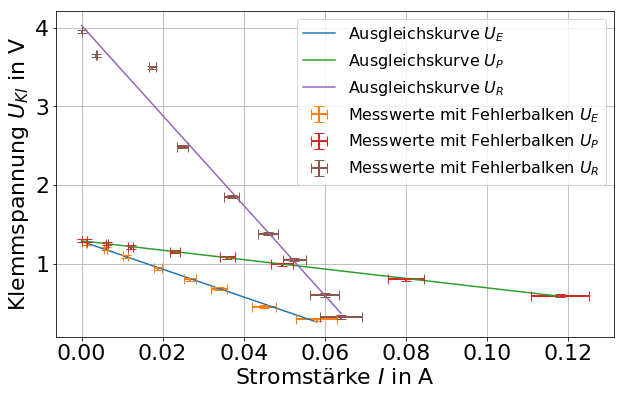

In [5]:
#Plot der daten einer Batterie

#I1=unv(U1/R)
#U1p=unv(U1)
def lin(x,m,b):
    return(m*x+b)

fig=plt.figure(figsize=(10,6))


x=unv(U1/R)
y=unv(U1)


p0=[ 1000000000000,  0.01103765]
poptue, pcovue, infodict, errmsg, ier = optimize.curve_fit(lin,x,y,p0=p0, full_output= True)
plt.plot(x,lin(x,*poptue),label='Ausgleichskurve $U_{E}$')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,usd(U1),usd(U1/R),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken $U_{E}$')


x=unv(UP/R)



y=unv(UP)
p0=[ -2,  5]
poptup, pcovup, infodict, errmsg, ier = optimize.curve_fit(lin,x,y,p0=p0, full_output= True)
plt.plot(x,lin(x,*poptup),label='Ausgleichskurve $U_{P}$')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,usd(UP),usd(UP/R),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken $U_{P}$')



x=unv(UR/R)



y=unv(UR)
p0=[ -2,  5]
poptur, pcovur, infodict, errmsg, ier = optimize.curve_fit(lin,x,y,p0=p0, full_output= True)
plt.plot(x,lin(x,*poptur),label='Ausgleichskurve $U_{R}$')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,usd(UR),usd(UR/R),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken $U_{R}$')




plt.legend(prop={'size':16}) #ehem 14
plt.grid()
plt.tick_params(labelsize=22)
plt.ylabel("Klemmspannung $U_{Kl}$ in V ", {'fontsize':22})
plt.xlabel("Stromstärke $I$ in A", {'fontsize': 22})
plt.savefig("Batterie Gesamt U.pdf")
plt.show()

In [6]:
#Werte Methode 1
Uekl=uc.ufloat(poptue[1],np.sqrt(np.diag(pcovue))[1])
Rie=uc.ufloat(-poptue[0],np.sqrt(np.diag(pcovue))[0])
print('Spannung der einzelnen Batterie Ue')
print(Uekl)
print('Innenwiderstand der einzelnen Batterie Rie')
print(Rie)
print('Up')
print(uc.ufloat(poptup[1],np.sqrt(np.diag(pcovup))[1]))
print('Rip')
print(uc.ufloat(-poptup[0],np.sqrt(np.diag(pcovup))[0]))
print('Ur')
print(uc.ufloat(poptur[1],np.sqrt(np.diag(pcovur))[1]))
print('Rir')
print(uc.ufloat(-poptur[0],np.sqrt(np.diag(pcovur))[0]))

Spannung der einzelnen Batterie Ue
1.282+/-0.010
Innenwiderstand der einzelnen Batterie Rie
17.70+/-0.35
Up
1.2891+/-0.0032
Rip
5.99+/-0.06
Ur
4.03+/-0.12
Rir
57.2+/-3.0


In [11]:
Rie=18
Rie*3, Rie/3

(54, 6.0)

In [7]:
l=np.arange(5,1000,0.1)

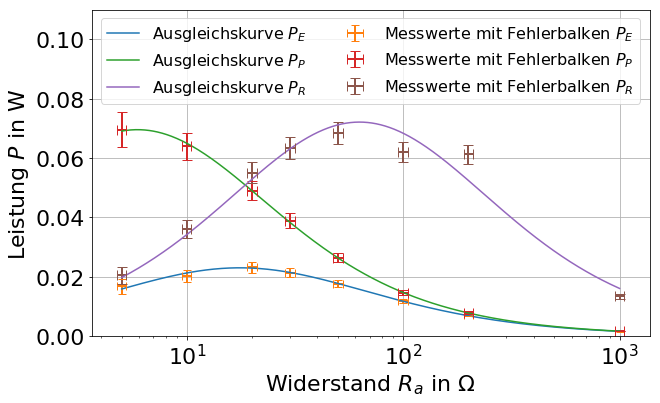

In [8]:
#Leistung eine Batterie

x=np.array(unv(R)[0:8])
y=np.array(unv(U1**2/R)[0:8])

def p(x,U0P,Ri):
    
    k=x*U0P**2/(x+Ri)**2
    return(k)

fig=plt.figure(figsize=(10,6))


p0=[1,1]
poptpe, pcovpe, infodict, errmsg, ier = optimize.curve_fit(p,x,y,p0=p0, full_output= True)
plt.plot(l,p(l,*poptpe),label='Ausgleichskurve $P_{E}$')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(unv(R)[0:8],unv(U1**2/R)[0:8],usd(U1**2/R)[0:8],usd(R)[0:8],fmt='none', capsize=4, linewidth=2, label='Messwerte mit Fehlerbalken $P_{E}$')

y=unv(UP**2/R)[0:8]

p0=[1,1]
poptpp, pcovpp, infodict, errmsg, ier = optimize.curve_fit(p,x,y,p0=p0, full_output= True)
plt.plot(l,p(l,*poptpp),label='Ausgleichskurve $P_{P}$')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(unv(R)[0:8],unv(UP**2/R)[0:8],usd(UP**2/R)[0:8],usd(R)[0:8],fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken $P_{P}$')

y=unv(UR**2/R)[0:8]

p0=[1,1]
poptpr, pcovpr, infodict, errmsg, ier = optimize.curve_fit(p,x,y,p0=p0, full_output= True)
plt.plot(l,p(l,*poptpr),label='Ausgleichskurve $P_{R}$')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(unv(R)[0:8],unv(UR**2/R)[0:8],usd(UR**2/R)[0:8],usd(R)[0:8],fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken $P_{R}$')




plt.legend(prop={'size':16},ncol=2,loc=9) #ehem 14
plt.grid()
plt.xscale('log')
plt.ylim((0,0.11))
#plt.xlim((0.5,1200))
plt.tick_params(labelsize=22)
plt.ylabel("Leistung $P$ in W ", {'fontsize':22})
plt.xlabel("Widerstand $R_{a}$ in $ \Omega$", {'fontsize': 22})
plt.savefig("Batterie Gesamt P.pdf")
plt.show()

In [9]:
#Werte Methode 2
print('Spannung der einzelnen Batterie Ue')
print(uc.ufloat(poptpe[0],np.sqrt(np.diag(pcovpe))[0]))
print('Innenwiderstand der einzelnen Batterie Rie')
print(uc.ufloat(poptpe[1],np.sqrt(np.diag(pcovpe))[1]))
print('Up')
print(uc.ufloat(poptpp[0],np.sqrt(np.diag(pcovpp))[0]))
print('Rip')
print(uc.ufloat(poptpp[1],np.sqrt(np.diag(pcovpp))[1]))
print('Ur')
print(uc.ufloat(poptpr[0],np.sqrt(np.diag(pcovpr))[0]))
print('Rir')
print(uc.ufloat(poptpr[1],np.sqrt(np.diag(pcovpr))[1]))

Spannung der einzelnen Batterie Ue
1.271+/-0.021
Innenwiderstand der einzelnen Batterie Rie
17.6+/-0.6
Up
1.282+/-0.007
Rip
5.91+/-0.09
Ur
4.26+/-0.21
Rir
63+/-5
